# Baseline model for Elle Ebène

## Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np

Les données proviennent du dossier raw_data : 1 dossier type 3, 1 dossier type 4.

Option 1: utilisation de Matplotlib. Problème : impossible de mettre toutes les images à la même taille (ou on le fait dans le modèle?).  
Option 2 : on commence par utiliser PIL, on met tout à la bonne taille, puis on passe en numpy array.  

=> Option 2

On commence par récupérer et explorer les images

In [3]:
from  PIL import Image

On fixe la hauteur de l'image, on fera un padding sur la largeur.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!cp drive/MyDrive/simple_preprocessing.py .

In [6]:
from simple_preprocessing import get_images

In [7]:
path = "/content/drive/MyDrive/Photos Elle Ebène"
type3_imgs = get_images("Type 3", path=path)
type4_imgs = get_images("Type 4", path=path)

In [8]:
print("number of type 3 images : " ,len(type3_imgs))
print("number of type 4 images : " ,len(type4_imgs))

number of type 3 images :  207
number of type 4 images :  203


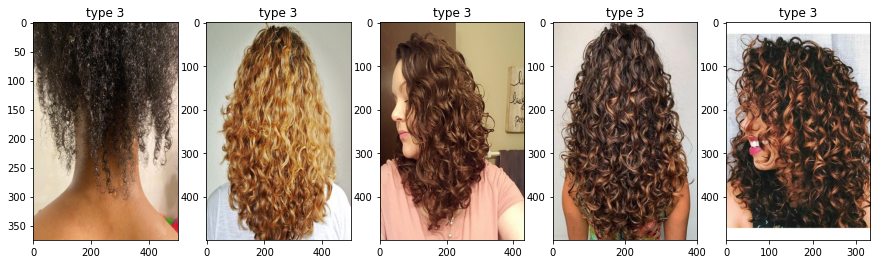

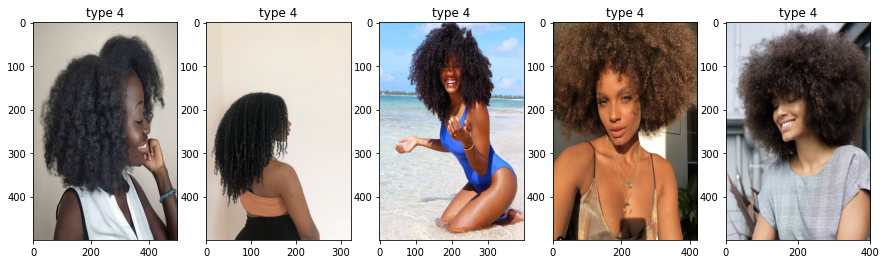

In [9]:
plt.figure(figsize=(15,4))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = type3_imgs[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 3")
plt.show()

plt.figure(figsize=(15,4))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = type4_imgs[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 4")
plt.show()

On a bien des hauteurs fixes.  
On convertit tout ça en numpy arrays et en rgb (3 canaux, on supprime brutalement le 4ème canal = alpha)

On a des rgba et des rgb, il faut convertir les formats.

In [10]:
from simple_preprocessing import to_numpy_rgb

In [11]:
type3_imgs_rgb = to_numpy_rgb(type3_imgs)
type4_imgs_rgb = to_numpy_rgb(type4_imgs)

In [12]:
print(type3_imgs_rgb[0].shape)
print(type4_imgs_rgb[0].shape)

(375, 500, 3)
(500, 500, 3)


On veut des images carrés de resizing_dim*resizing_dim

In [13]:
from simple_preprocessing import squared_imgs

In [14]:
type3_imgs_squared = squared_imgs(type3_imgs_rgb)
type4_imgs_squared = squared_imgs(type4_imgs_rgb)

In [15]:
print(type3_imgs_squared[0].shape)
print(type4_imgs_squared[0].shape)

(500, 500, 3)
(500, 500, 3)


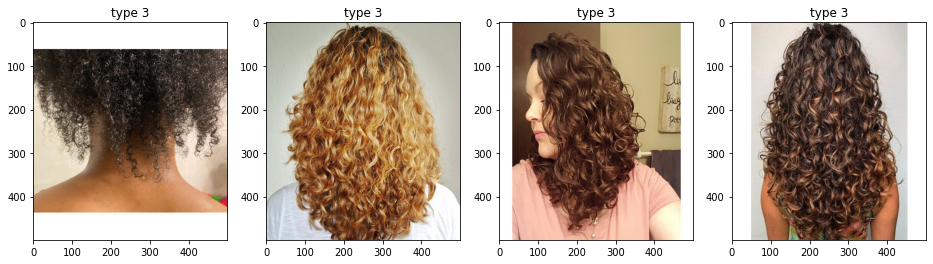

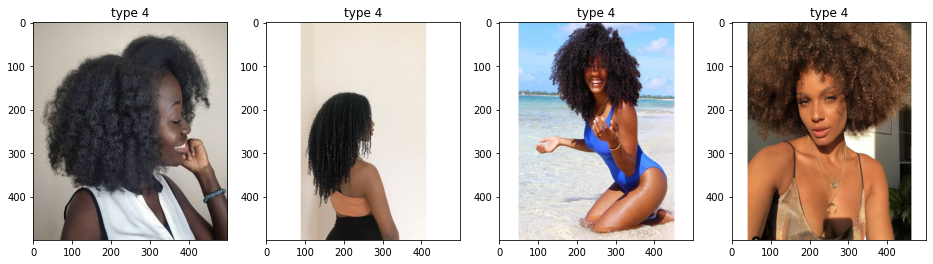

In [16]:
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = type3_imgs_squared[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 3")
plt.show()

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = type4_imgs_squared[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 4")
plt.show()

## Creation of the dataset

In [17]:
type3_labels = np.full((len(type3_imgs_squared),),3)
type4_labels = np.full((len(type4_imgs_squared),),4)

In [18]:
type3_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [19]:
from simple_preprocessing import create_dataset

In [20]:
X, y = create_dataset([type3_imgs_squared, type4_imgs_squared], [type3_labels, type4_labels])

In [21]:
print(len(X))
print(len(y))

410
410


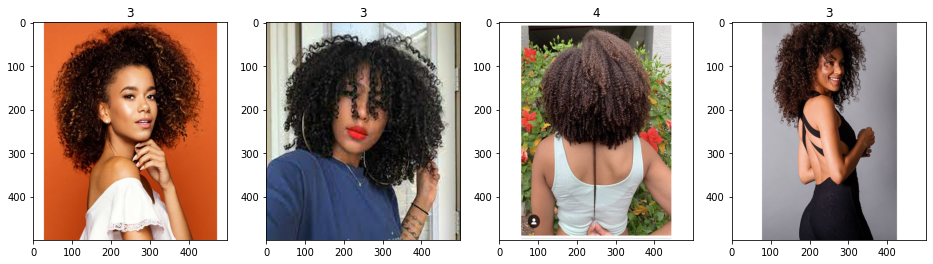

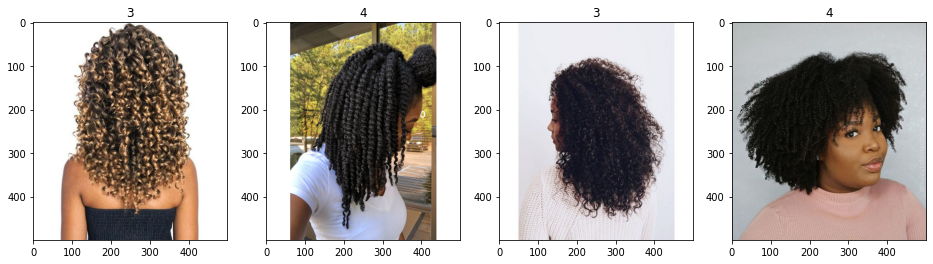

In [22]:
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = X[i]
    plt.imshow(img, aspect = "auto")
    plt.title(y[i])
plt.show()

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = X[4+i]
    plt.imshow(img, aspect = "auto")
    plt.title(y[4+i])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model

Normalisation des photos (simple)

In [25]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_train = to_categorical(y_train,5)[:,-2:]
y_test = to_categorical(y_test,5)[:,-2:]

In [28]:
y_train.shape

(287, 2)

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [30]:
def initialize_model():
   
    model  = models.Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(64, kernel_size=(4, 4), activation='relu', input_shape=(500, 500, 3), padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))
    model.add(layers.Dropout(rate=0.2))
    
    ### Second convolution
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))    
    model.add(layers.Dropout(rate=0.2))
    
    ### Third convolution
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))    
    model.add(layers.Dropout(rate=0.4))
    
    ### Third convolution
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (2,2)))    
    model.add(layers.Dropout(rate=0.4))

    ### Flattening
    model.add(layers.Flatten())
    
    ### One fully connected
    model.add(layers.Dense(128, activation='relu')) 
    model.add(layers.Dropout(rate=0.5))

    ### Last layer
    model.add(layers.Dense(2, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])
    
    return model

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 500, 500, 64)      3136      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 31, 128)      

In [68]:
es = EarlyStopping(patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split = 0.2,
          epochs=200, batch_size=8, verbose=1, callbacks = [es])

Epoch 1/200
29/29 [==============================] - 2s 65ms/step - loss: 0.7165 - accuracy: 0.5502 - val_loss: 0.6978 - val_accuracy: 0.4138
Epoch 2/200
29/29 [==============================] - 2s 56ms/step - loss: 0.6940 - accuracy: 0.5459 - val_loss: 0.6961 - val_accuracy: 0.4138
Epoch 3/200
29/29 [==============================] - 2s 56ms/step - loss: 0.6939 - accuracy: 0.5109 - val_loss: 0.6966 - val_accuracy: 0.4138
Epoch 4/200
29/29 [==============================] - 2s 55ms/step - loss: 0.6900 - accuracy: 0.5459 - val_loss: 0.6989 - val_accuracy: 0.4138
Epoch 5/200
29/29 [==============================] - 2s 55ms/step - loss: 0.6904 - accuracy: 0.5502 - val_loss: 0.7003 - val_accuracy: 0.4138
Epoch 6/200
29/29 [==============================] - 2s 55ms/step - loss: 0.6879 - accuracy: 0.5415 - val_loss: 0.7033 - val_accuracy: 0.4138
Epoch 7/200
29/29 [==============================] - 2s 55ms/step - loss: 0.6917 - accuracy: 0.5590 - val_loss: 0.6988 - val_accuracy: 0.4138
Epoch 

In [69]:
import matplotlib.pyplot as plt

In [70]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f73044a0f50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7304492490>)

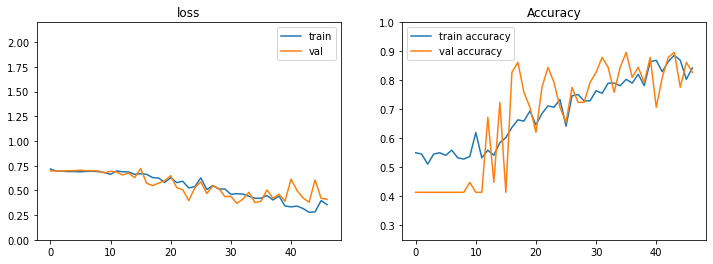

In [71]:
plot_history(history)


In [78]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 2s 333ms/step - loss: 0.6105 - accuracy: 0.7398


[0.6104523539543152, 0.7398374080657959]

On teste avec les cheveux secs

In [73]:
type4sec_imgs = get_images("Type 4 sec", path=path)

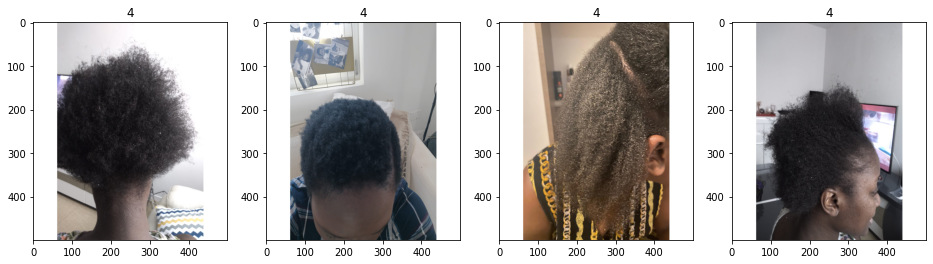

In [74]:
type4sec_imgs_rgb = to_numpy_rgb(type4sec_imgs)
type4sec_imgs_squared = squared_imgs(type4sec_imgs_rgb)
type4sec_labels = np.full((len(type4sec_imgs_squared),),4)

Xsec, ysec = create_dataset([type4sec_imgs_squared], [type4sec_labels])

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = Xsec[i]
    plt.imshow(img, aspect = "auto")
    plt.title(ysec[i])
plt.show()

In [75]:
ysec = to_categorical(ysec,5)[:,-2:]
Xsec = Xsec / 255

In [80]:
model.evaluate(Xsec, ysec)

1/1 [==============================] - 0s 90ms/step - loss: 0.4196 - accuracy: 0.8519


[0.419630765914917, 0.8518518805503845]

In [84]:
model.save_weights("/content/drive/MyDrive/ElleEbèneProject/baseline/weights")

In [85]:
model2 = initialize_model()

In [86]:
model2.load_weights("/content/drive/MyDrive/ElleEbèneProject/baseline/weights")

In [87]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 1s 71ms/step - loss: 0.6105 - accuracy: 0.7398


[0.6104523539543152, 0.7398374080657959]